# Final Exam. Image Processing and Pattern Recognition. 2024.

### `1. Write a code to generate the image given below. (10 pts)`

- With: 300  
- Height: 200

<nop/><div style="width:500px"> 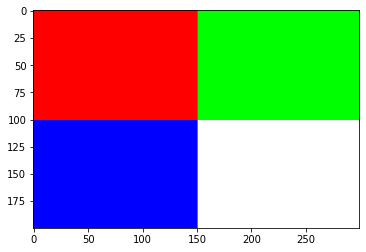

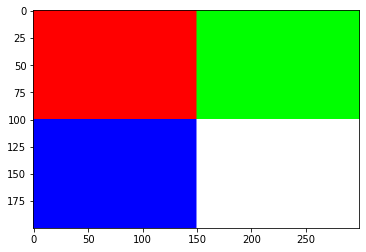

In [1]:
import matplotlib.pyplot as plt
import numpy as np

image = np.zeros((200, 300, 3), dtype=np.uint8)

image[:100, :150] = [255, 0, 0]       
image[:100, 150:] = [0, 255, 0]       
image[100:, :150] = [0, 0, 255]       
image[100:, 150:] = [255, 255, 255]   

plt.imshow(image)
plt.show()

### `2. Transform the number 7 in seven.png to the original one. (10 pts)`

***`You can use all packages`***

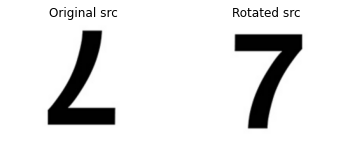

In [3]:
import cv2
import matplotlib.pyplot as plt


src = cv2.imread("seven.png",cv2.IMREAD_COLOR)

rotated_src = cv2.rotate(src, cv2.ROTATE_180)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('Original src')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotated_src, cv2.COLOR_BGR2RGB))
plt.title('Rotated src')
plt.axis('off')

plt.show()


### `3. Affine transform (30pts)`

***Read `triangle.png`***


***`3-A`***. Find the x-y coordinates of three vertices (꼭지점) of the red triangle in `triangle.png without usig open-cv`. (20 pts)

(500, 300, 3)


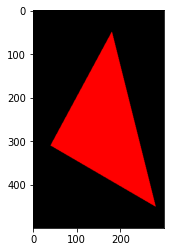

In [52]:
import matplotlib.pyplot as plt
import matplotlib.image as img

src= img.imread("triangle.png")
print(src.shape)
plt.imshow(src)
plt.show()

import matplotlib.pyplot as plt
import numpy as np

src.shape

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

src.shape

for i in range(500):
    for j in range(300):
      if src[i][j][2] == [255, 0, 0]:
         print(i,j)
         break

***`3-B`***. Perform the `Affine Transform` to transform the triangle into the equilateral triangle below (10 pts)

<nop/> <div style="width:300px">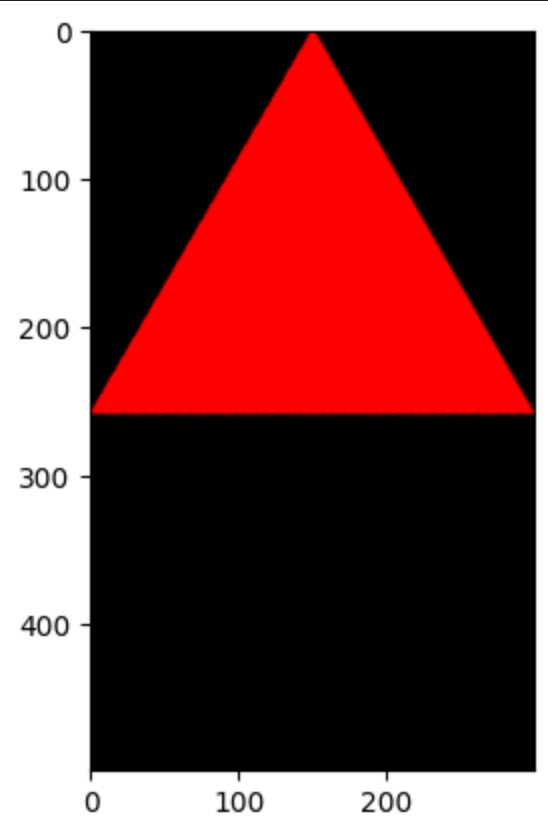

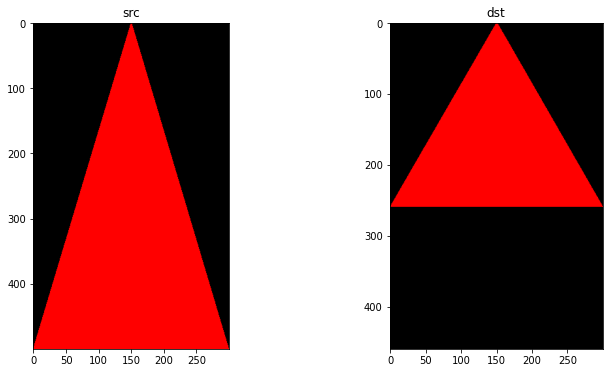

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

height = 500
width = 300
red = (0, 0, 255)

src = np.zeros((height, width, 3), dtype=np.uint8)

pts_tri = [[0, height-1], [int(width/2), 0], [width-1, height-1]]
cv2.fillConvexPoly(src, np.array(pts_tri), red)

side_length = 300

pts_src = np.float32([[0, height-1], [int(width/2), 0], [width-1, height-1]])

height_equilateral = int(np.sqrt(side_length**2 - (side_length/2)**2))

pts_dst = np.float32([[0, side_length-1], [side_length/2, side_length-1-height_equilateral], [side_length-1, side_length-1]])

M_cv2 = cv2.getAffineTransform(pts_src, pts_dst)

dst = cv2.warpAffine(src, M_cv2, (src.shape[1], src.shape[0]))

dst = dst[side_length-1-height_equilateral:src.shape[0]]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('src')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('dst')

plt.show()

### `4. Face Detection (20 pts)`  

***Read `bts.jpg`***

***`4-A`.*** Detect all faces from the given image, draw boxes of the faces, and show the result. $[10pts]$  

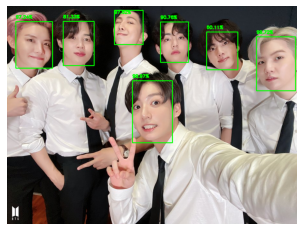

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

modelFile = "../models/res10_300x300_ssd_iter_140000.caffemodel"
configFile = "../models/deploy.prototxt.txt"
net = cv2.dnn.readNetFromCaffe(configFile, modelFile)

scale = 1.0
out_size = (300, 300)
avg_to_remove = (104.0, 177.0, 123.0)

def detect_face_dnn_cv(src):
    (h, w) = src.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(src, out_size), scale, out_size, avg_to_remove)
    net.setInput(blob)
    detections = net.forward()

    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.5:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            text = f"{confidence * 100:.2f}%"

            # Draw the bounding box and label on the image
            cv2.rectangle(src, (startX, startY), (endX, endY), (0, 255, 0), 2)
            y = startY - 10 if startY - 10 > 10 else startY + 10
            cv2.putText(src, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 0), 2)

    return src

src = cv2.imread("bts.jpg")
src = detect_face_dnn_cv(src)

dst = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

plt.imshow(dst)
plt.axis('off') 
plt.show()

***`4-B`***. Select the largest faces in terms of area, `draw a red box of the face`, and show the result $[5 pts]$

`If you have multiple answers, choose one as you want.`



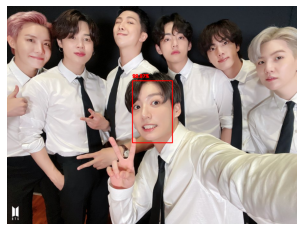

In [33]:
#B
import cv2
import numpy as np
import matplotlib.pyplot as plt

modelFile = "../models/res10_300x300_ssd_iter_140000.caffemodel"
configFile = "../models/deploy.prototxt.txt"
net = cv2.dnn.readNetFromCaffe(configFile, modelFile)

scale = 1.0
out_size = (300, 300)
avg_to_remove = (104.0, 177.0, 123.0)

def detect_largest_face_dnn_cv(src):
    (h, w) = src.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(src, out_size), scale, out_size, avg_to_remove)
    net.setInput(blob)
    detections = net.forward()

    largest_face = None 
    largest_area = 0     

    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.5:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            box_area = (endX - startX) * (endY - startY)  
            if box_area > largest_area:  
                largest_area = box_area
                largest_face = (startX, startY, endX, endY, confidence)

    if largest_face:  
        (startX, startY, endX, endY, confidence) = largest_face
        text = f"{confidence * 100:.2f}%"
        cv2.rectangle(src, (startX, startY), (endX, endY), (0, 0, 255), 2)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.putText(src, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

    return src

src = cv2.imread("bts.jpg")
src = detect_largest_face_dnn_cv(src)

dst = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

plt.imshow(dst)
plt.axis('off') 
plt.show()


***`4-C.`*** Select the face with the smallest area, `draw a blue box of the face`, and show the result $[5 pts]$

`If you have multiple answer, choose one as you want.`

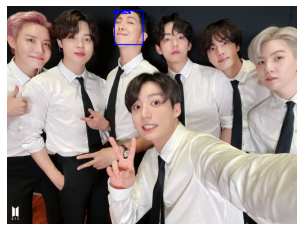

In [35]:
#B
import cv2
import numpy as np
import matplotlib.pyplot as plt

modelFile = "../models/res10_300x300_ssd_iter_140000.caffemodel"
configFile = "../models/deploy.prototxt.txt"
net = cv2.dnn.readNetFromCaffe(configFile, modelFile)

scale = 1.0
out_size = (300, 300)
avg_to_remove = (104.0, 177.0, 123.0)

def detect_small_face_dnn_cv(src):
    (h, w) = src.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(src, out_size), scale, out_size, avg_to_remove)
    net.setInput(blob)
    detections = net.forward()

    largest_face = None 
    largest_area = 999999999     

    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.5:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            box_area = (endX - startX) * (endY - startY)  
            if box_area < largest_area:  
                largest_area = box_area
                largest_face = (startX, startY, endX, endY, confidence)

    if largest_face:  
        (startX, startY, endX, endY, confidence) = largest_face
        text = f"{confidence * 100:.2f}%"
        cv2.rectangle(src, (startX, startY), (endX, endY), (255, 0, 0), 2)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.putText(src, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 0, 0), 2)

    return src

src = cv2.imread("bts.jpg")
src = detect_largest_face_dnn_cv(src)

dst = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

plt.imshow(dst)
plt.axis('off') 
plt.show()


### `5. Perspective Transform (30 pts)`

***Read `rectangle.png`***

***`5-A)`*** Find four x-y coordinates of vertices (꼭지점) `without usig open-cv`. (20 pts)

(400, 400, 3)


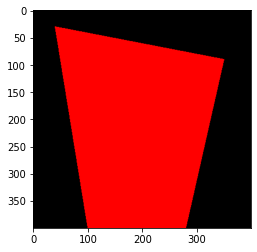

In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as img

src= img.imread("rectangle.png")
print(src.shape)
plt.imshow(src)
plt.show()

***`5-B)`***  Perform `Perspective Transform` to warp the quadrangle (사각형) into the 300x300 sqaure (정사각형). (10 pts)

- The center point should be on the center of the image.

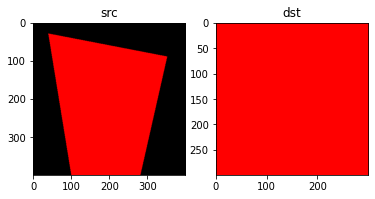

In [51]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

src = cv2.imread("rectangle.png")
src_pts= np.float32([[40,30],[320, 100],[280,400-1],[100,400-1]])

dst_size = 300
dst_pts = np.float32([[0, 0], [dst_size-1, 0], [dst_size-1, dst_size-1], [0, dst_size-1]])

M = cv2.getPerspectiveTransform(src_pts, dst_pts)

dst = cv2.warpPerspective(src, M, (dst_size, dst_size))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('src')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('dst')

plt.show()